In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('/home/mikhail/it-academy/модуль 2/Практическая часть/descriptive_stats/clients.csv')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [3]:
#переименовал колонки для удобства
df = df.rename({'Customer ID':'Customer','Age Interval ':'Age_Interval','Type of property':'Type_of_property','Area (ft.)':'Area','Age at time of purchase':'Age_at_time_of_purchase'},axis = 1)
# Добавил колонку форматированный Price для сравнения цены с другими атрибутами
df['Price_formating'] = df['Price'].str.replace('$','').str.strip().str.replace(',','').astype('float64')
df['Area_kvm'] = df['Area']* 0.09290304
df['Country'] = df['Country'].str.strip() #удалил пробелы в начале и конце строки
df.head()

/tmp/ipykernel_19252/480236375.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,ID,Building,Year of sale,Month of sale,Type_of_property,Property number,Area,Price,Status,Customer,...,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Price_formating,Area_kvm
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,21.0,F,USA,California,Home,5,No,Website,246172.68,69.035320
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,24.0,F,USA,California,Home,5,No,Website,246331.90,70.254208
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,27.0,M,USA,California,Home,1,Yes,Client,209280.91,54.560097
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,27.0,M,USA,California,Investment,3,Yes,Website,452667.01,149.086153
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,15.0,F,USA,California,Home,4,No,Agency,467083.31,127.783486


In [4]:
df.shape # посмотрел сколько строк и колонок

(195, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type_of_property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area                     195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer                 195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age_at_time_of_purchase  178 non-null    float64
 14  Age_Interval             1

In [6]:
df.describe()

,ID,Building,Year of sale,Month of sale,Property number,Area,Age_at_time_of_purchase,Y,M,D,Deal satisfaction,Price_formating,Area_kvm
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000,195.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,46.151685,1960.325843,6.752809,15.449438,3.605128,269434.560923,83.600392
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,12.841692,12.835575,3.450312,8.457285,1.363355,80129.094465,24.293174
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,19.000000,1931.000000,1.000000,1.000000,1.000000,117564.070000,38.156208
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,37.000000,1950.250000,4.000000,8.000000,3.000000,212393.250000,68.735243
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,45.000000,1962.000000,6.000000,15.000000,4.000000,243052.590000,72.973480
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,55.000000,1969.750000,9.750000,23.750000,5.000000,308550.875000,99.913503
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,76.000000,1986.000000,15.000000,31.000000,5.000000,529317.280000,180.464155


Мы видим, что больше недвижимости покупают Individual. Так как строки со значением в организации = Firm имеют в некоторых колонках null значения, то в дальнейшем я буду использовать датафрейм df_entity, где строки со значением организации Firm будут удалены




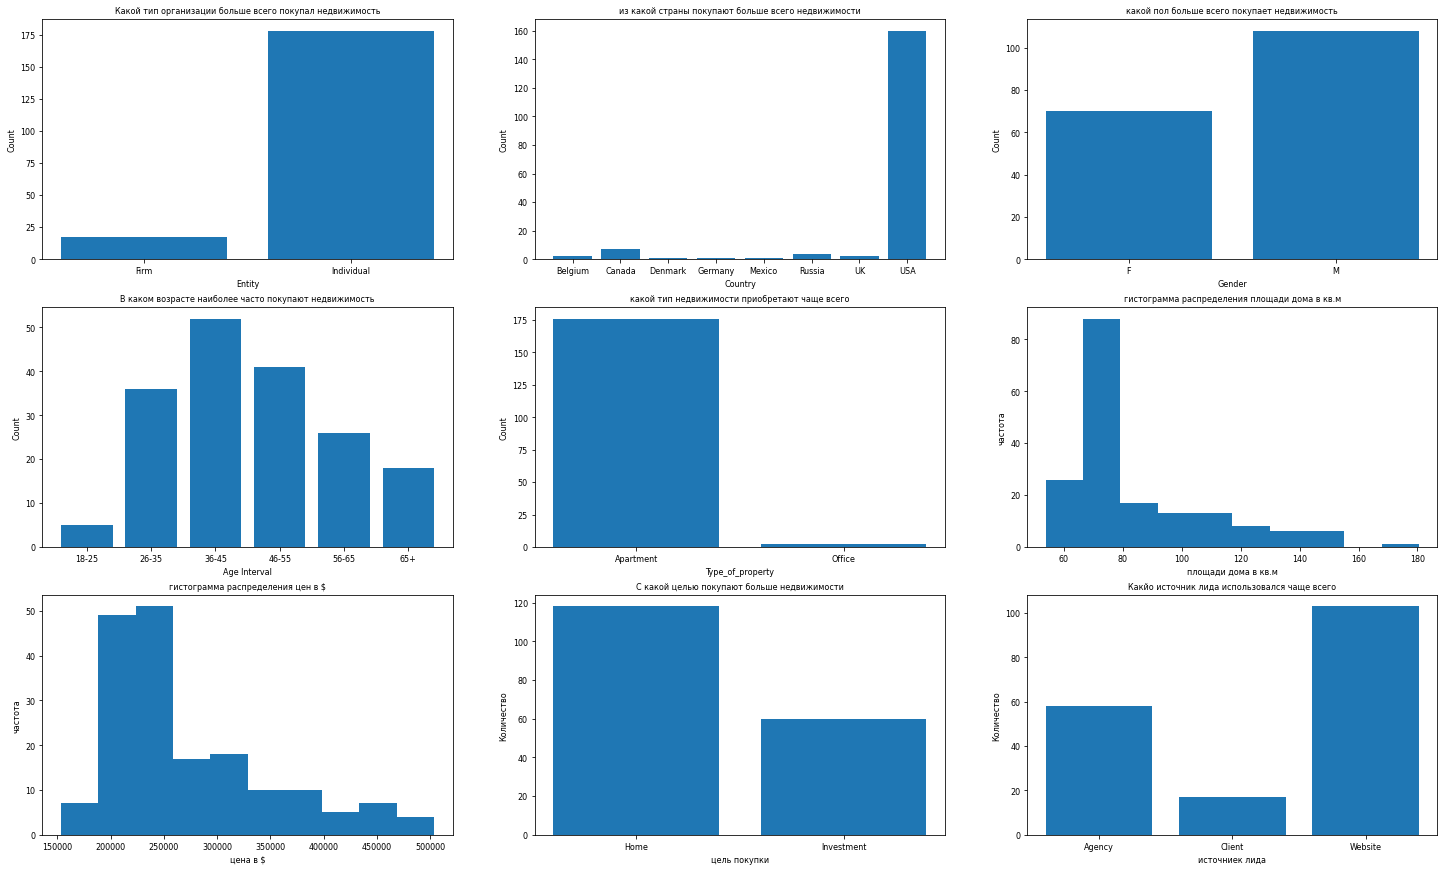

In [9]:

fig = plt.figure(figsize=(25,15))

ax_1 = fig.add_subplot(3, 3, 1)
ax_2 = fig.add_subplot(3, 3, 2)
ax_3 = fig.add_subplot(3, 3, 3)
ax_4 = fig.add_subplot(3, 3, 4)
ax_5 = fig.add_subplot(3, 3, 5)
ax_6 = fig.add_subplot(3, 3, 6)
ax_7 = fig.add_subplot(3, 3, 7)
ax_8 = fig.add_subplot(3, 3, 8)
ax_9 = fig.add_subplot(3, 3, 9)

plt.rcParams['font.size'] = '8'


# какой тип организации больше всего покупают недвижимость
df_Entity_count = df.groupby('Entity').count()['ID']
ax_1.bar(df_Entity_count.index, df_Entity_count.values)
ax_1.set_title('Какой тип организации больше всего покупал недвижимость',fontsize=8)
ax_1.set_xlabel('Entity')
ax_1.set_ylabel('Count')


df_entity = df.drop(df[df.Entity == 'Firm'].index,inplace=False)
print('Мы видим, что больше недвижимости покупают Individual. Так как строки со значением в организации = Firm имеют в некоторых колонках null значения, то в дальнейшем я буду использовать датафрейм df_entity, где строки со значением организации Firm будут удалены')
print('\n')

df_country_count = df_entity.groupby('Country').count()['ID']
ax_2.bar(df_country_count.index, df_country_count.values)
ax_2.set_title('из какой страны покупают больше всего недвижимости',fontsize=8)
ax_2.set_xlabel('Country',fontsize=8)
ax_2.set_ylabel('Count',fontsize=8)

# какое количество мужчин и женщин покупают недвижимость
df_gender_count = df_entity.groupby('Gender').count()['ID']
ax_3.bar(df_gender_count.index, df_gender_count.values)
ax_3.set_title('какой пол больше всего покупает недвижимость',fontsize=8)
ax_3.set_xlabel('Gender',fontsize=8)
ax_3.set_ylabel('Count',fontsize=8)

#В каком возрасте наиболее часто покупают недвижимость
df_Age_Interval_count = df_entity.groupby('Age_Interval').count()['ID']
ax_4.bar(df_Age_Interval_count.index, df_Age_Interval_count.values)
ax_4.set_title('В каком возрасте наиболее часто покупают недвижимость',fontsize=8)
ax_4.set_xlabel('Age Interval',fontsize=8)
ax_4.set_ylabel('Count',fontsize=8)

# какой тип недвижимости приобретают чаще всего
Type_of_property_count = df_entity.groupby('Type_of_property').count()['ID']
ax_5.bar(Type_of_property_count.index, Type_of_property_count.values)
ax_5.set_title('какой тип недвижимости приобретают чаще всего',fontsize=8)
ax_5.set_xlabel('Type_of_property')
ax_5.set_ylabel('Count')

#Посмотрим на гистограмму распределения площади дома в кв.м
#ax = df_entity.Area_kvm.hist();
ax_6.hist(df_entity.Area_kvm.values)
ax_6.set_title('гистограмма распределения площади дома в кв.м',fontsize=8);
ax_6.set_xlabel('площади дома в кв.м');
ax_6.set_ylabel('частота');

#Посмотрим на гистограмму распределения цены 
ax_7.hist(df_entity.Price_formating.values)
ax_7.set_title('гистограмма распределения цен в $',fontsize=8);
ax_7.set_xlabel('цена в $');
ax_7.set_ylabel('частота');

#количество сделок и цель покупки
df_Purpose_count = df_entity.groupby('Purpose').count()['ID']
ax_8.bar(df_Purpose_count.index, df_Purpose_count.values)
ax_8.set_title('С какой целью покупают больше недвижимости',fontsize=8)
ax_8.set_xlabel('цель покупки')
ax_8.set_ylabel('Количество')


#количество сделок и источник лида 
df_Source_count = df_entity.groupby('Source').count()['ID']
ax_9.bar(df_Source_count.index, df_Source_count.values)
ax_9.set_title('Какйо источник лида использовался чаще всего',fontsize=8)
ax_9.set_xlabel('источниек лида')
ax_9.set_ylabel('Количество')

plt.show()


In [10]:
#Мы видим, что больше недвижимости покупают Individual
Entity = df.groupby('Entity').count()['ID'].idxmax() # Individual

#Мы видим, что больше недвижимости покупают в США. 
Country = df_entity.groupby('Country').count()['ID'].idxmax()

#Мы видим, что больше недвижимости покупают мужчины. 
gender = df_entity.groupby('Gender').count()['ID'].idxmax() # пол 

# средний возраст считаем по медиане, так как оно наиболее устойчиво к выбросам. А так как распределение не идеально симетричное, то выбрал медиану.
median_age = df_entity['Age_at_time_of_purchase'].median()
median_age # Средний возраст

# Тип квартиры. Ищем моду
Type_of_property = Type_of_property_count.idxmax()
Type_of_property #Тип квартиры

#Поскольку есть сильный выброс, то лучше считать медиану.
Area_kvm = df_entity.median()['Area_kvm']
Area_kvm #Площадь дома в кв.м. 

#Поскольку есть сильный выброс, то лучше считать медиану.
Price = df_entity.Price_formating.median()
Price  # Средний чек 

# Мы видим, что цель покупки Home встречается больше всего
Purpose = df_Purpose_count.idxmax()
Purpose #Цель покупки

# Мы видим, что источник лида Website встречается больше всего
Source = df_Source_count.idxmax()
Source #Источник лида

print('Типичный портрет целевого клиента данной риэлторской компании:')
print('Пол - {0}\nВозраст - {1}\nТип квартиры - {2}\nПлощадь - {3} кв.м.\nСредний чек - {4} $\nЦель покупки - {5}\nИсточник лида - {6}\nСтрана - {7}\nОрганизация - {8}'.format(gender, median_age, Type_of_property, Area_kvm, Price, Purpose, Source, Country, Entity))

Типичный портрет целевого клиента данной риэлторской компании:
Пол - M
Возраст - 45.0
Тип квартиры - Apartment
Площадь - 73.62844629119999 кв.м.
Средний чек - 245196.73 $
Цель покупки - Home
Источник лида - Website
Страна - USA
Организация - Individual


/tmp/ipykernel_19252/3263006258.py:19: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

